# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
# <a href=https://www.ramp.studio/problems/covertype>RAMP</a> on predicting forest type

<i> Balázs Kégl (LAL/CNRS), Alex Gramfort (INRIA)</i>

In [1]:
%matplotlib inline
import imp
import numpy as np
import pandas as pd
import pylab as plt

## Introduction

## Fetch the data and load it in pandas

First we load `problem.py` that parameterizes the challenge. It contains some objects taken off the shelf from `ramp-workflow` (e.g., `Predictions` type, scores, and data reader). 

In [2]:
problem = imp.load_source('', 'problem.py')

AttributeError: module 'rampwf.workflows' has no attribute 'Estimator'

`get_train_data` loads the training data and returns an `pandas` object (input) and a `np.array` object (output).

In [3]:
X_df, y_array = problem.get_train_data()

To speed up the computation we'll just pick a subset of the data

In [4]:
from sklearn.model_selection import train_test_split
X_df, _, y_array, _ = train_test_split(
    X_df, y_array, train_size=1 / 20., stratify=y_array, random_state=42)

In [5]:
X_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
6379,0.574787,0.366667,0.378788,0.085898,0.257106,0.868203,0.984252,0.858268,0.318898,0.488499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237990,0.582291,0.380556,0.151515,0.085898,0.233850,0.231558,0.929134,0.929134,0.511811,0.158929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8291,0.666333,0.188889,0.136364,0.154617,0.253230,0.676971,0.901575,0.877953,0.496063,0.196849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213578,0.568284,0.155556,0.075758,0.231210,0.262274,0.725727,0.877953,0.901575,0.555118,0.792974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37484,0.517259,0.541667,0.166667,0.787402,0.516796,0.349867,0.858268,0.980315,0.645669,0.198801,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,...,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000
mean,0.549943,0.431413,0.215164,0.191239,0.283861,0.330028,0.835588,0.878557,0.559740,0.277858,...,0.044131,0.088881,0.078417,0.003442,0.003236,0.000138,0.000757,0.025955,0.024096,0.014182
std,0.139674,0.311146,0.113485,0.151288,0.074906,0.218330,0.106196,0.077206,0.150648,0.185070,...,0.205393,0.284582,0.268835,0.058572,0.056794,0.011734,0.027510,0.159007,0.153354,0.118247
min,0.010005,0.000000,0.000000,0.000000,0.043928,0.000000,0.141732,0.350394,0.000000,0.004182,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473237,0.161111,0.136364,0.077309,0.232558,0.155543,0.779528,0.838583,0.468504,0.144431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568284,0.350000,0.196970,0.156049,0.262274,0.279893,0.858268,0.889764,0.562992,0.239370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.652326,0.722222,0.287879,0.273443,0.312661,0.465505,0.913386,0.933071,0.661417,0.357312,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.996998,1.000000,0.818182,0.926271,0.939276,0.976114,1.000000,1.000000,0.992126,0.981040,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
X_df.dtypes

Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area1                      float64
Wilderness_Area2                      float64
Wilderness_Area3                      float64
Wilderness_Area4                      float64
Soil_Type1                            float64
Soil_Type2                            float64
Soil_Type3                            float64
Soil_Type4                            float64
Soil_Type5                            float64
Soil_Type6                            float64
Soil_Type7                            float64
Soil_Type8                        

In [8]:
full_data_df = X_df.copy()
full_data_df['Cover_Type'] = y_array
full_data_df.groupby('Cover_Type').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,5296,5296,5296,5296,5296,5296,5296,5296,5296,5296,...,5296,5296,5296,5296,5296,5296,5296,5296,5296,5296
2,7082,7082,7082,7082,7082,7082,7082,7082,7082,7082,...,7082,7082,7082,7082,7082,7082,7082,7082,7082,7082
3,894,894,894,894,894,894,894,894,894,894,...,894,894,894,894,894,894,894,894,894,894
4,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
5,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237
6,434,434,434,434,434,434,434,434,434,434,...,434,434,434,434,434,434,434,434,434,434
7,513,513,513,513,513,513,513,513,513,513,...,513,513,513,513,513,513,513,513,513,513


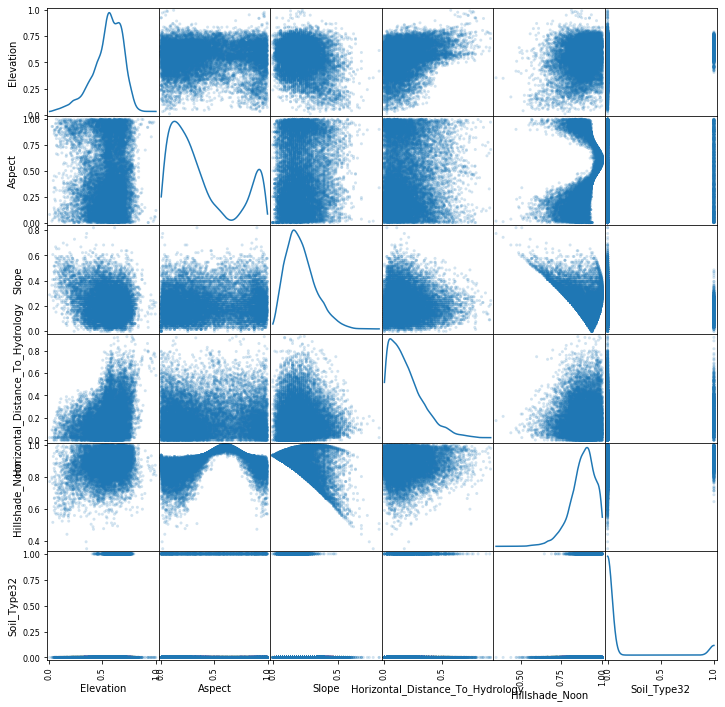

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    X_df.get(
        ['Elevation', 'Aspect', 'Slope',
         'Horizontal_Distance_To_Hydrology',
         'Hillshade_Noon', 'Soil_Type32']),
    alpha=0.2, figsize=(12, 12), diagonal='kde');

<Figure size 864x576 with 0 Axes>

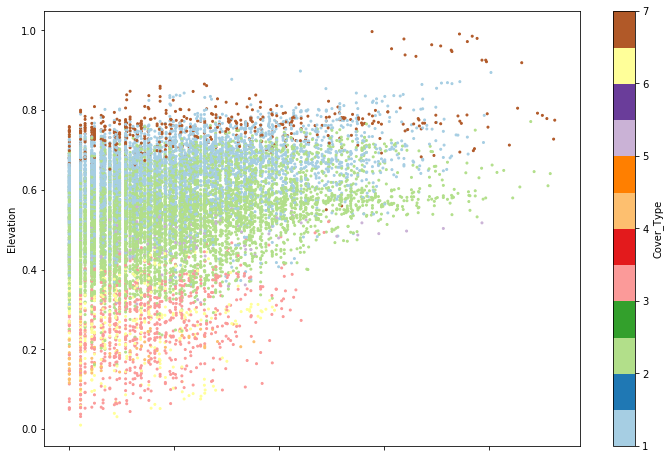

In [10]:
plt.figure(figsize=(12, 8));
full_data_df.plot(
    kind='scatter', x='Horizontal_Distance_To_Hydrology',
    y='Elevation', c='Cover_Type', s=4, cmap=plt.cm.Paired,
    figsize=(12, 8));

### A linear regressor baseline

In [11]:
X_array = X_df.values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_array, y_array, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(solver='liblinear')

scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring='accuracy')
print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(scores), np.std(scores)))

RMSE: 0.7062 +/- 0.0081


## Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 10
max_depth = 10
max_features = 10
clf = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring='accuracy')
print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(scores), np.std(scores)))

RMSE: 0.7395 +/- 0.0042


## Variable permutation importances

In [15]:
from sklearn.inspection import permutation_importance

clf.fit(X_train, y_train)
feature_importances = permutation_importance(
    clf, X_train, y_train, n_repeats=10
)

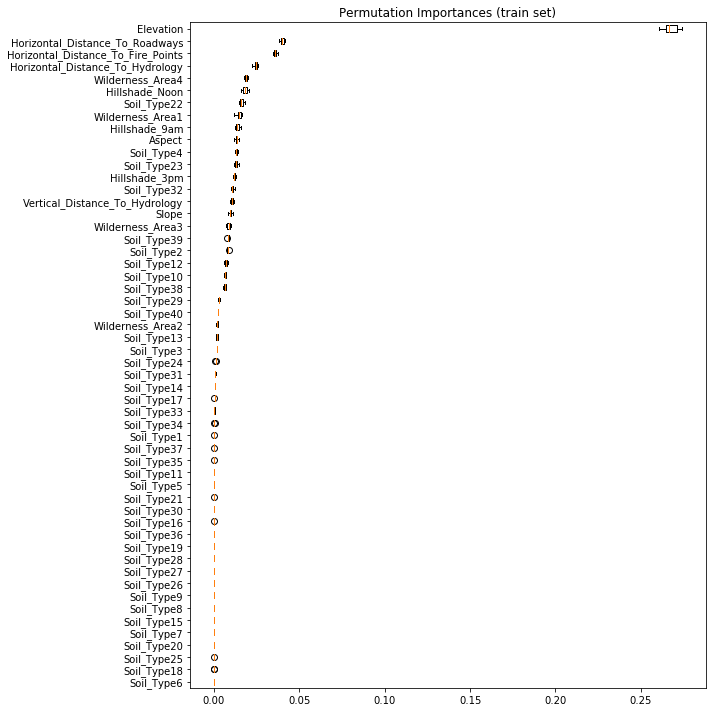

In [16]:
sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_df.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Building predictive models

In [17]:
%%file submissions/starting_kit/estimator.py

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def get_estimator():
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(C=1., solver='liblinear')
    )

Overwriting submissions/starting_kit/estimator.py


In [18]:
%run submissions/starting_kit/estimator.py

<Figure size 432x288 with 0 Axes>

In [19]:
clf = get_estimator()

In [20]:
score_type = problem.score_types[0]

In [21]:
# We need to convert y_proba into winning label names
y_pred_labels = clf.fit(X_train, y_train).predict(X_train)
score = score_type(y_train, y_pred_labels)
score

0.7156626506024096

In [22]:
X_test_df, y_test_array = problem.get_test_data()

y_pred_labels = clf.predict(X_test_df)
score = score_type(y_test_array, y_pred_labels)
score

0.7134482592442153

## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit).

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `feature_extractor.py` and `classifier.py` are in the  [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](http://localhost:8890/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

In [23]:
#!ramp-test --submission=starting_kit --quick-test